<a href="https://colab.research.google.com/github/ChaithanyaNadithoka/Barcode-Scanner/blob/main/Copy_of_DIP_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install -y zbar-tools libzbar-dev
!pip install pyzbar pillow

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,619 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,738 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,514 k

Saving Barcode1.jpg to Barcode1 (1).jpg
Decoded Barcodes:


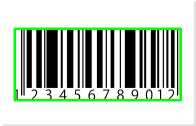

In [ ]:

# Import required libraries
import cv2
import numpy as np
from pyzbar.pyzbar import decode
from google.colab import files
from google.colab.patches import cv2_imshow
from PIL import Image

# Upload file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

def preprocess(image_path, show_steps=False):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, None, fx=0.7, fy=0.7, interpolation=cv2.INTER_CUBIC)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate x & y gradients
    gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

    # Subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    if show_steps:
        cv2_imshow(gradient)

    # Blur and threshold the image
    blurred = cv2.blur(gradient, (3, 3))
    _, thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
    return image, thresh

def detect_barcode(image_path):
    # Preprocess the image
    image, thresh = preprocess(image_path)

    # Find contours
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Combine all contours into one bounding box
    if contours:
        # Concatenate all points from contours
        all_points = np.concatenate([c for c in contours])
        rect = cv2.minAreaRect(all_points)  # Get the bounding box for all points
        box = cv2.boxPoints(rect)
        box = np.intp(box)  # Updated for deprecation warning
        cv2.drawContours(image, [box], -1, (0, 255, 0), 3)

    # Decode barcodes (if any)
    pil_image = Image.open(image_path).convert("RGB")
    decoded = decode(pil_image)

    print("Decoded Barcodes:")
    for obj in decoded:
        print(f"Type: {obj.type}, Data: {obj.data.decode('utf-8')}")

    # Display the final image with the corrected bounding box
    cv2_imshow(cv2.resize(image, None, fx=0.5, fy=0.5))

# Run the detection
detect_barcode(image_path)
